		|------------------------------------|
		|Welcome to the Pathfinding Algorithm|
		|1. Load grid from a file            |
		|2. Enter grid manually              |
		|------------------------------------|


	Enter your choice (1 or 2):  1
	Enter the file name with (txt) extention:  a_star_search_example_1.txt


Running DFS...
Algorithm: dfs, Found: 1


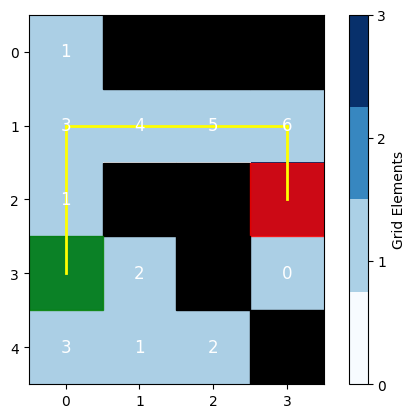

Running BFS...
Algorithm: bfs, Found: 1


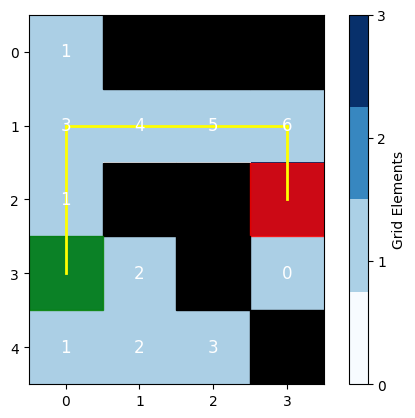

Running UCS...
Algorithm: ucs, Found: 1


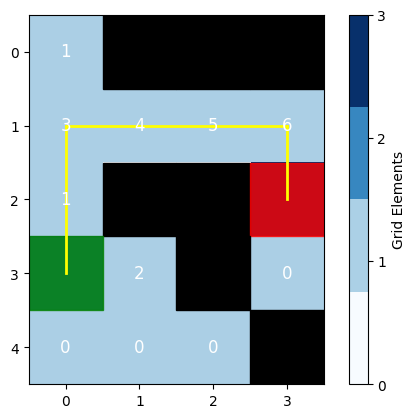

Running BEST_FIRST...
Algorithm: best_first, Found: 1


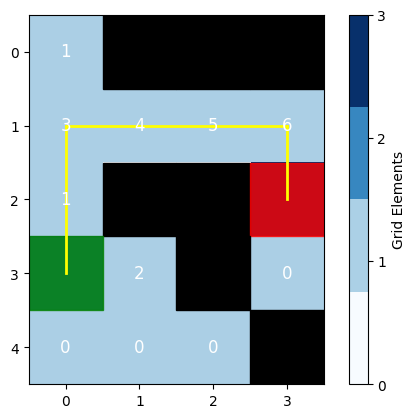

Running A_STAR...
Algorithm: a_star, Found: 1


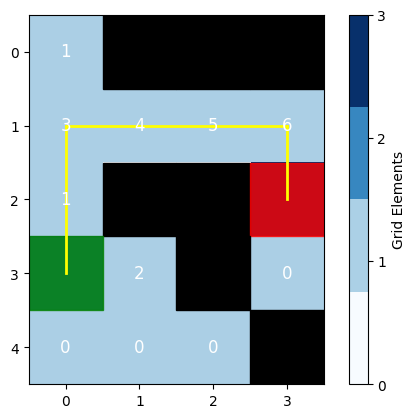

In [14]:
from typing import List, Tuple
import heapq
import matplotlib.pyplot as plt
import numpy as np
from collections import deque


class SearchAlgorithm:
    @staticmethod
    def get_neighbors(x: int, y: int, grid: List[List[str]]) -> List[Tuple[int, int]]:
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        neighbors = []
        for dx, dy in directions:
            nx, ny = x + dx, y + dy
            if 0 <= nx < len(grid) and 0 <= ny < len(grid[0]) and grid[nx][ny] != '-1':
                neighbors.append((nx, ny))
        return neighbors

    @staticmethod
    def get_start_target(grid: List[List[str]]) -> Tuple[Tuple[int, int], Tuple[int, int]]:
        start, target = None, None
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == 's':
                    start = (i, j)
                elif grid[i][j] == 't':
                    target = (i, j)
        return start, target

    @staticmethod
    def reconstruct_path(grid, path, start, target):
        x, y = target
        while (x, y) in path:
            prev_x, prev_y = path[(x, y)]
            plt.plot([y, prev_y], [x, prev_x], color='yellow', linewidth=2)
            x, y = prev_x, prev_y
        grid[start[0]][start[1]] = 's'
        return grid

    @staticmethod
    def visualize_grid(grid):
        grid_numeric = np.zeros((len(grid), len(grid[0])))
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == '-1':
                    grid_numeric[i][j] = 0
                elif grid[i][j] == 's':
                    grid_numeric[i][j] = 2
                elif grid[i][j] == 't':
                    grid_numeric[i][j] = 3
                else:
                    grid_numeric[i][j] = 1
        cmap = plt.colormaps['Blues'].resampled(4)
        plt.imshow(grid_numeric, cmap=cmap, interpolation='nearest')
        for i in range(len(grid)):
            for j in range(len(grid[0])):
                if grid[i][j] == '-1':
                    plt.gca().add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color='black', alpha=1.0))
                elif grid[i][j] == 's':
                    plt.gca().add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color='green', alpha=0.8))
                elif grid[i][j] == 't':
                    plt.gca().add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color='red', alpha=0.8))
                if grid[i][j] not in ['s', 't', '-1']:
                    plt.text(j, i, grid[i][j], ha='center', va='center', color='white', fontsize=12)
        plt.colorbar(ticks=[0, 1, 2, 3], label='Grid Elements')
        plt.show()

    @staticmethod
    def search(grid: List[List[str]], algorithm: str) -> Tuple[int, List[List[str]]]:
        start, target = SearchAlgorithm.get_start_target(grid)
        if not start or not target:
            raise ValueError("Start ('s') or Target ('t') not found in the grid.")
        visited = set()
        path = {}
        traversal_order = 1
        if algorithm == "dfs":
            stack = [start]
        elif algorithm == "bfs":
            stack = deque([start])
        elif algorithm in ["ucs", "best_first", "a_star"]:
            stack = [(0, start)]
            heapq.heapify(stack)
        else:
            raise ValueError(f"Unsupported algorithm: {algorithm}")
        while stack:
            if algorithm == "dfs":
                x, y = stack.pop()
            elif algorithm == "bfs":
                x, y = stack.popleft()
            else:
                _, (x, y) = heapq.heappop(stack)
            if (x, y) in visited:
                continue
            visited.add((x, y))
            if grid[x][y] == '0':
                grid[x][y] = str(traversal_order)
                traversal_order += 1
            if (x, y) == target:
                return 1, SearchAlgorithm.reconstruct_path(grid, path, start, target)
            for nx, ny in reversed(SearchAlgorithm.get_neighbors(x, y, grid)):
                if (nx, ny) not in visited:
                    if algorithm in ["dfs", "bfs"]:
                        stack.append((nx, ny))
                    else:
                        priority = 0 if algorithm == "ucs" else abs(nx - target[0]) + abs(ny - target[1])
                        heapq.heappush(stack, (priority, (nx, ny)))
                    path[(nx, ny)] = (x, y)
        return -1, grid


def load_grid_from_file(file_path: str) -> List[List[str]]:
    try:
        with open(file_path, 'r') as file:
            grid = [line.strip().split() for line in file.readlines()]
        max_cols = max(len(row) for row in grid)
        for row in grid:
            while len(row) < max_cols:
                row.append('-1')
        return grid
    except Exception as e:
        print(f"Error loading grid from file: {e}")
        return []


def get_grid_from_user() -> List[List[str]]:
    print("\tEnter the grid row by row. \t Use '-1' for walls, 's' for start, and 't' for target.")
    print("\tType 'done' when finished.")
    grid = []
    while True:
        row_input = input("\tEnter a row (space-separated values): ")
        if row_input.lower() == 'done':
            break
        row = row_input.strip().split()
        grid.append(row)
    max_cols = max(len(row) for row in grid)
    for row in grid:
        while len(row) < max_cols:
            row.append('-1')
    return grid


if __name__ == "__main__":
    print("\t\t|------------------------------------|")
    print("\t\t|Welcome to the Pathfinding Algorithm|")
    print("\t\t|1. Load grid from a file            |")
    print("\t\t|2. Enter grid manually              |")
    print("\t\t|------------------------------------|")
    choice = input("\tEnter your choice (1 or 2): ")

    if choice == '1':
        file_path = input("\tEnter the file name with (txt) extention: ")
        grid = load_grid_from_file(file_path)
    elif choice == '2':
        grid = get_grid_from_user()
    else:
        print("\tWrong input")
        print("\tExiting.")
        exit()

    if not grid:
        print("\tNo valid grid loaded. Exiting.")
        exit()

    algorithms = ["dfs", "bfs", "ucs", "best_first", "a_star"]
    for algo in algorithms:
        print(f"Running {algo.upper()}...")
        found, final_state = SearchAlgorithm.search([row[:] for row in grid], algo)
        print(f"Algorithm: {algo}, Found: {found}")
        SearchAlgorithm.visualize_grid(final_state)